In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib
import random
import sys

# --- Reproducibility ---
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# --- Load Dataset (make sure heart_disease_v1.csv is in your working directory) ---
df = pd.read_csv("heart_disease_v1.csv")
print("Heart Disease Dataset Preview:")
print(df.head())
# Check class distribution
print("\nTarget value counts:")
print(df["target"].value_counts())

# If dataset has only one class, add artificial negative samples
if df["target"].nunique() < 2:
    print("Adding artificial class '0' examples for testing...")
    fake_rows = df.head(5).copy()
    fake_rows["target"] = 0
    df = pd.concat([df, fake_rows], ignore_index=True)
    print("\nNew Target value counts:")
    print(df["target"].value_counts())

X=df.drop(target,,axis=1)
y=df["target"]






# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split dataset with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)

# Confirm train and test sets have both classes
if y_train.nunique() < 2 or y_test.nunique() < 2:
    sys.exit("Train or Test set contains only one class after splitting. Use stratify=y or a larger dataset.")

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression models with different regularizations
penalties = {"L2": "l2", "L1": "l1", "ElasticNet": "elasticnet"}

for name, penalty in penalties.items():
    if penalty == "elasticnet":
        model = LogisticRegression(
            penalty=penalty,
            solver="saga",
            l1_ratio=0.5,
            random_state=SEED,
            max_iter=1000
        )
    else:
        model = LogisticRegression(
            penalty=penalty,
            solver="liblinear" if penalty == "l1" else "lbfgs",
            random_state=SEED,
            max_iter=1000
        )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\n=== {name} Regularization ===")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds, zero_division=0))

    # Save the trained model
    joblib.dump(model, f"logistic_{name.lower()}.pkl")

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")

print("\n Training complete. Models & scaler saved.")


Heart Disease Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Target value counts:
target
1    30
Name: count, dtype: int64
Adding artificial class '0' examples for testing...

New Target value counts:
target
1    30
0     5
Name: count, dtype: int64

=== L2 Regularization ===
Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      

Student Scores Dataset Preview:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
R² Score: 0.9837
Mean Squared Error: 12.1321


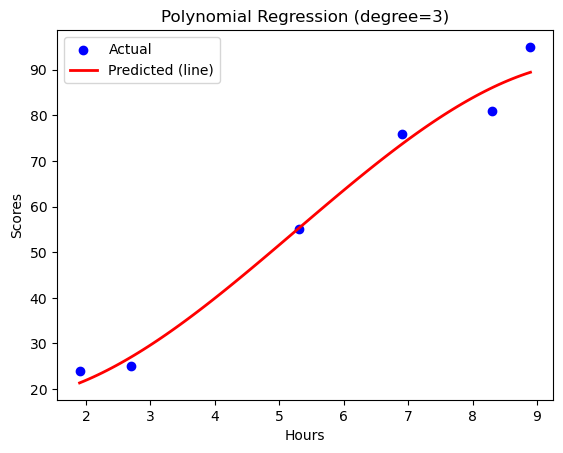


Training complete. Model, scaler, and transformer saved.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import random

# --- Reproducibility ---
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# --- Load dataset ---
df = pd.read_csv("student_scores_v1.csv")  # Put the CSV file in your working directory
print("Student Scores Dataset Preview:")
print(df.head())

# Assuming dataset columns: 'Hours' (input) and 'Scores' (target)
X = df[['Hours']].values  # Features should be 2D for sklearn
y = df['Scores'].values

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Polynomial features ---
degree = 3  # You can change this degree for more/less complexity
poly_transformer = PolynomialFeatures(degree=degree)
X_train_poly = poly_transformer.fit_transform(X_train_scaled)
X_test_poly = poly_transformer.transform(X_test_scaled)

# --- Train Linear Regression on polynomial features ---
model = LinearRegression()
model.fit(X_train_poly, y_train)

# --- Predict & evaluate ---
y_pred = model.predict(X_test_poly)

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

# --- Plot actual vs predicted ---

plt.scatter(X_test, y_test, color='blue', label='Actual')

# Create a fine grid of values spanning the range of Hours
X_grid = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)

# Scale and polynomial transform the grid
X_grid_scaled = scaler.transform(X_grid)
X_grid_poly = poly_transformer.transform(X_grid_scaled)

# Predict on the grid
y_grid_pred = model.predict(X_grid_poly)

# Plot predicted line
plt.plot(X_grid, y_grid_pred, color='red', linewidth=2, label='Predicted (line)')

plt.title(f'Polynomial Regression (degree={degree})')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

# --- Save scaler, polynomial transformer, and model ---
joblib.dump(scaler, "student_scores_scaler.pkl")
joblib.dump(poly_transformer, "student_scores_poly_transformer.pkl")
joblib.dump(model, "student_scores_poly_model.pkl")

print("\nTraining complete. Model, scaler, and transformer saved.")


In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import joblib
import random

# --- Reproducibility ---
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# --- Load Iris dataset ---
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_class = iris.target  # For classification

# For regression target, predict 'petal length (cm)'
y_reg = X['petal length (cm)']

# Use other features except 'petal length (cm)' as predictors for regression
X_reg = X.drop(columns=['petal length (cm)'])

# --- Split data for regression ---
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=SEED
)

# Scale regression features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# --- Train Multiple Linear Regression ---
reg_model = LinearRegression()
reg_model.fit(X_train_reg_scaled, y_train_reg)

# Predict & evaluate regression
y_pred_reg = reg_model.predict(X_test_reg_scaled)
print("Multiple Linear Regression Results:")
print(f"R² Score: {r2_score(y_test_reg, y_pred_reg):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")

# Save regression model and scaler
joblib.dump(reg_model, "iris_linear_regression_model.pkl")
joblib.dump(scaler_reg, "iris_regression_scaler.pkl")


# --- Prepare data for classification (KNN) ---
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_class, test_size=0.2, stratify=y_class, random_state=SEED
)

# Scale classification features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# --- Evaluate KNN for different K values ---
print("\nKNN Classification Performance for different K values:")

best_k = None
best_acc = 0

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_clf_scaled, y_train_clf)
    y_pred_clf = knn.predict(X_test_clf_scaled)
    acc = accuracy_score(y_test_clf, y_pred_clf)
    print(f"K={k}: Accuracy = {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k
        best_model = knn

print(f"\nBest K: {best_k} with accuracy {best_acc:.4f}")
print("Classification report for best K:")
print(classification_report(y_test_clf, best_model.predict(X_test_clf_scaled)))

# Save best KNN model and scaler
joblib.dump(best_model, f"iris_knn_k{best_k}_model.pkl")
joblib.dump(scaler_clf, "iris_knn_scaler.pkl")

print("\n Models and scalers saved.")


Multiple Linear Regression Results:
R² Score: 0.9603
Mean Squared Error: 0.1300

KNN Classification Performance for different K values:
K=1: Accuracy = 0.9667
K=2: Accuracy = 0.9333
K=3: Accuracy = 0.9333
K=4: Accuracy = 0.9333
K=5: Accuracy = 0.9333
K=6: Accuracy = 0.9333
K=7: Accuracy = 0.9667
K=8: Accuracy = 0.9333
K=9: Accuracy = 0.9667
K=10: Accuracy = 0.9667
K=11: Accuracy = 0.9667
K=12: Accuracy = 0.9667
K=13: Accuracy = 0.9667
K=14: Accuracy = 0.9667
K=15: Accuracy = 0.9667

Best K: 1 with accuracy 0.9667
Classification report for best K:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


 Models and scalers saved.
